# Week 10 handin

## 01 Assignment
Exercise meanshift
load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. 
Now we are left with a 2D feature space

get unique labels (Species column)

plot with a scatter plot each iris flower sample colored by label (3 different colors)image.png

use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)

print out labels, cluster centers and number of clusters (as returned from the MeanShift function)

create a new scatter plot where each flower is colored according to cluster label

add a dot for the cluster centers

Compare the 2 plots (colored by actual labels vs. colored by cluster label)

Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## 02 Status

## 03 Solution

In [102]:
import pandas as pd

data = pd.read_csv('../data/iris_data.csv', decimal=',')
print(data.columns)
data.drop(['Petal length', 'Petal width'], inplace=True, axis=1)

print(data)

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object')
     Sepal length  Sepal width       Species
0             5.1          3.5     I. setosa
1             4.9          3.0     I. setosa
2             4.7          3.2     I. setosa
3             4.6          3.1     I. setosa
4             5.0          3.6     I. setosa
..            ...          ...           ...
145           6.7          3.0  I. virginica
146           6.3          2.5  I. virginica
147           6.5          3.0  I. virginica
148           6.2          3.4  I. virginica
149           5.9          3.0  I. virginica

[150 rows x 3 columns]


In [103]:
uniqSpecies = data['Species'].unique().tolist()
print(uniqSpecies)

['I. setosa', 'I. versicolor', 'I. virginica']


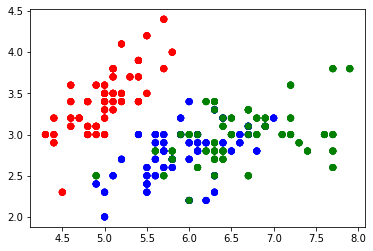

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x,y,z = data['Sepal length'], data['Sepal width'], data['Species']

colors = 'bgrcmy'
x,y,z = data['Sepal length'], data['Sepal width'], data['Species']
data['Species'] = label_enc.fit_transform(data['Species'].astype(str))
for s,col in zip(z,colors):
    colormap = np.array(['r','b','g'])
    plt.scatter(x,y, c=colormap[data['Species']])


In [105]:
from sklearn.cluster import estimate_bandwidth
data = data.drop('Species', axis=1)
bandwidth = estimate_bandwidth(data, quantile=0.2)
bandwidth2 = estimate_bandwidth(data, quantile=0.15)
print(bandwidth)

from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_data = ms.fit(data)
labels = ms.labels_
centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print('labels')
print(labels)
print('cluster_centers')
print(centers)
print('n_clusters')
print(n_clusters)

0.5782805830511767
labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
cluster_centers
[[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]
n_clusters
3


In [106]:
labels = analyzer.labels_
print(labels)
print('\n\n',np.unique(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 [0 1 2 3]


In [107]:
data['cluster_group'] = np.nan
for i in range(len(data)): 
    data.iloc[i,data.columns.get_loc('cluster_group')] = labels[i]
cluster_data = data.groupby(['cluster_group']).mean()
data


,Sepal length,Sepal width,cluster_group
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
...,...,...,...
145,6.7,3.0,2.0
146,6.3,2.5,2.0
147,6.5,3.0,2.0
148,6.2,3.4,2.0


Text(0.5, 1.0, 'Estimated number of clusters: 3')

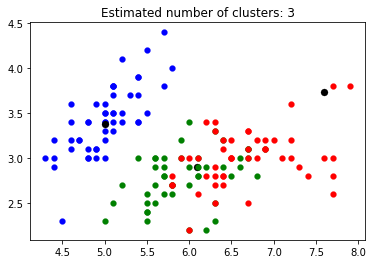

In [108]:
from itertools import cycle

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = centers[k]
    
    x = data[labels == k]['Sepal length']
    y = data[labels == k]['Sepal width']
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))